First  three steps


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import random
from grid import *


In [77]:
grid_size = (10, 10)
grid = np.zeros(grid_size)  # 0 = empty, 1 = wall, 2 = room, 3 = door, 4 = window

In [78]:
print(grid)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [79]:
def gen_room(grid, start, size):
    """
    1 = room, 2 = walls
    """
    x, y = start
    w, h = size

    if x + w > grid.shape[0] or y + h > grid.shape[1]:
        raise ValueError("Room does not fit in the grid.")

    grid[x:x+w, y:y+h] = 1

    grid[x-1:x+w+1, y-1] = 2  # Top wall
    grid[x-1:x+w+1, y+h] = 2  # Bottom wall
    grid[x-1, y:y+h] = 2  # Left wall
    grid[x+w, y:y+h] = 2  # Right wall
    print(grid)

    return grid

In [80]:
start = (1,1)
size = (3,3)
grid2 = gen_room(grid, start, size)

[[2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [2. 1. 1. 1. 2. 0. 0. 0. 0. 0.]
 [2. 1. 1. 1. 2. 0. 0. 0. 0. 0.]
 [2. 1. 1. 1. 2. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


UP(1, [[0, 1, 0], [0, 1, 0], [0, 0, 0]])


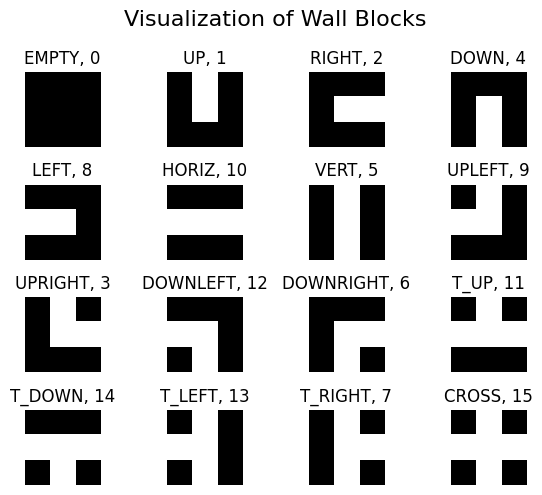

In [81]:
wall = Wall(1)
# Visualization
fig, axes = plt.subplots(4, 4, figsize=(6, 5))
print(wall)
for ax, wall in zip(axes.flat, Wall):
    ax.imshow(wall.ins, cmap = "gray")
    ax.set_title(f"{wall.name}, {wall.value}")
    ax.axis('off')


plt.suptitle('Visualization of Wall Blocks', fontsize=16)
plt.tight_layout()

plt.show()


In [82]:
def gen_rect(size, Wall=Wall, plot=True):
    """
    Function to generate a rectangle and placing accurate corner pieces as well
    """
    x, y = size
    rect = []
    top = [Wall(6)] + (x-2)*[Wall(10)] + [Wall(12)]
    mid = [Wall(5)] + [Wall(0)] * (x - 2) + [Wall(5)]
    bottom = [Wall(3)] + [Wall(10)] * (x - 2) + [Wall(9)]
    rect = np.array([top] + [mid] * (y - 2) + [bottom])
    if (plot): plot_rect(size, rect)
    return rect

def glue_rect(rect_a, rect_b, offset = 0, Wall=Wall, plot=True):
    """
    Any of the 8 sides, with offset left-side corner, also take care of connecting wall and corners
    """
    
    y_a, x_a = rect_a.shape
    y_b, x_b = rect_b.shape
    print(f"x_a={x_a}, y_a={y_a}")
    print(f"x_b={x_b}, y_b={y_b}")
    print(f"Offset: {offset}")
    
    combined_shape = (y_a + y_b - 1, max(x_a, offset + x_b))
    y_c, x_c = combined_shape
    combined_rect = np.full(combined_shape, Wall.EMPTY, dtype=object)

    combined_rect[:y_a, :x_a] = rect_a.copy()
    combined_rect[y_a-1 :y_a+y_b-1, offset:offset+x_b ] = rect_b.copy()
    # Fix corners and destroy connecting wall, 
    # Border is from y = y_a, x = offset to x = offset + x_b 
    for j in range(x_b):
        # Left-hand side corner
        if j == 0:
            combined_rect[y_a-1, offset] = Wall(12) if offset > 0 else Wall(5)

        # Destroy wall in between
        if 0 < j < x_a-1 - offset:
            combined_rect[y_a-1, offset + j] = Wall(0)

        # Right-hand side corner
        if j == x_a - 1 - offset:
            if offset + x_b < x_a:
                combined_rect[y_a-1, offset + j] = Wall(6)
            elif offset + x_b == x_a:
                combined_rect[y_a-1, offset + j] = Wall(5)
            else:
                combined_rect[y_a-1, offset + j] = Wall(3)
    if plot:
        plot_rect((x_c, y_c), combined_rect)
    return combined_rect

def plot_rect(size, rect):
    fig, axes = plt.subplots(size[1], size[0], figsize=size, gridspec_kw={'wspace': 0, 'hspace': 0})
    
    for ax, row in zip(axes.flatten(), rect.flatten()):
        ax.imshow(row.ins, aspect='auto')
        ax.axis('off')


    plt.tight_layout()
    plt.show()


In [ ]:


def int_to_wall(rect, Wall=Wall):
    """
    Converts a numpy array of integers to an array of Wall objects.
    Each integer is transformed to Wall(n) where n is the integer value.
    """
    return np.vectorize(lambda x: Wall(x))(rect)

def gen_rect_int(size):
    """
    Function to generate a rectangle and placing accurate corner pieces as well

    """
    x, y = size
    rect = []
    
    # Using integers for walls: 6, 10, 12, 5, 3, 9
    top = [6] + (x-2)*[10] + [12]
    mid = [5] + [0] * (x - 2) + [5]
    bottom = [3] + [10] * (x - 2) + [9]
    
    # Construct the rectangle
    rect = np.array([top] + [mid] * (y - 2) + [bottom])
    
    return rect

def glue_rect_int(rect_a, rect_b, offset=0, plot=True):
    """
    Glue two rectangles (rect_a and rect_b) together with a specified offset.
    Handles the corners and connecting walls, represented with integers.
    """
    
    y_a, x_a = rect_a.shape
    y_b, x_b = rect_b.shape
    print(f"x_a={x_a}, y_a={y_a}")
    print(f"x_b={x_b}, y_b={y_b}")
    print(f"Offset: {offset}")
    
    # Create combined shape (rows, columns)
    combined_shape = (y_a + y_b - 1, max(x_a, offset + x_b))
    y_c, x_c = combined_shape
    combined_rect = np.full(combined_shape, 0, dtype=int)  # Use 0 to represent empty spaces

    # Place rect_a into the combined grid
    combined_rect[:y_a, :x_a] = rect_a.copy()
    # Place rect_b with offset into the combined grid
    combined_rect[y_a-1 : y_a + y_b - 1, offset : offset + x_b] = rect_b.copy()

    # Fix corners and destroy connecting wall
    for j in range(x_b):
        # Left-hand side corner
        if j == 0:
            combined_rect[y_a-1, offset] = 12 if offset > 0 else 5

        # Destroy wall in between
        if 0 < j < x_a - 1 - offset:
            combined_rect[y_a-1, offset + j] = 0  # Empty space

        # Right-hand side corner
        if j == x_a - 1 - offset:
            if offset + x_b < x_a:
                combined_rect[y_a-1, offset+j] = 6
            elif offset + x_b == x_a:
                combined_rect[y_a-1, offset+j] = 5
            else:
                combined_rect[y_a-1, offset+j] = 3

    return combined_rect


def place_room(floor):
    """
    Function to create and place room
    So it goes through plan and when it find corner it places opposing corner. 
    Should add option for inside vs outside
    """
    y, x = floor.shape
    for i, j in np.ndindex(y,x):
        if floor[i,j] = 6: # Top-right
        
    return floor


"""
def gen_floor(size_a, size_b=0 , L=True, Wall=Wall, plot=True):
    Generate floor, size_a is "primary" rectangle and size_b is "secondary" if L or T-shaped
    rect_a = gen_rect(size_a)
    if (size_b == 0): output = rect_a
    else: 
        rect_b = gen_rect(size_b)
        if (L):
            
        else:


    return rect"
"""
#def place_room(size, Wall=Wall, rect)

'\ndef gen_floor(size_a, size_b=0 , L=True, Wall=Wall, plot=True):\n    Generate floor, size_a is "primary" rectangle and size_b is "secondary" if L or T-shaped\n    rect_a = gen_rect(size_a)\n    if (size_b == 0): output = rect_a\n    else: \n        rect_b = gen_rect(size_b)\n        if (L):\n            \n        else:\n\n\n    return rect"\n'

In [84]:
size = (20, 30)
rect = gen_rect(size, plot=False)

x_a=10, y_a=20
x_b=15, y_b=5
Offset: 5


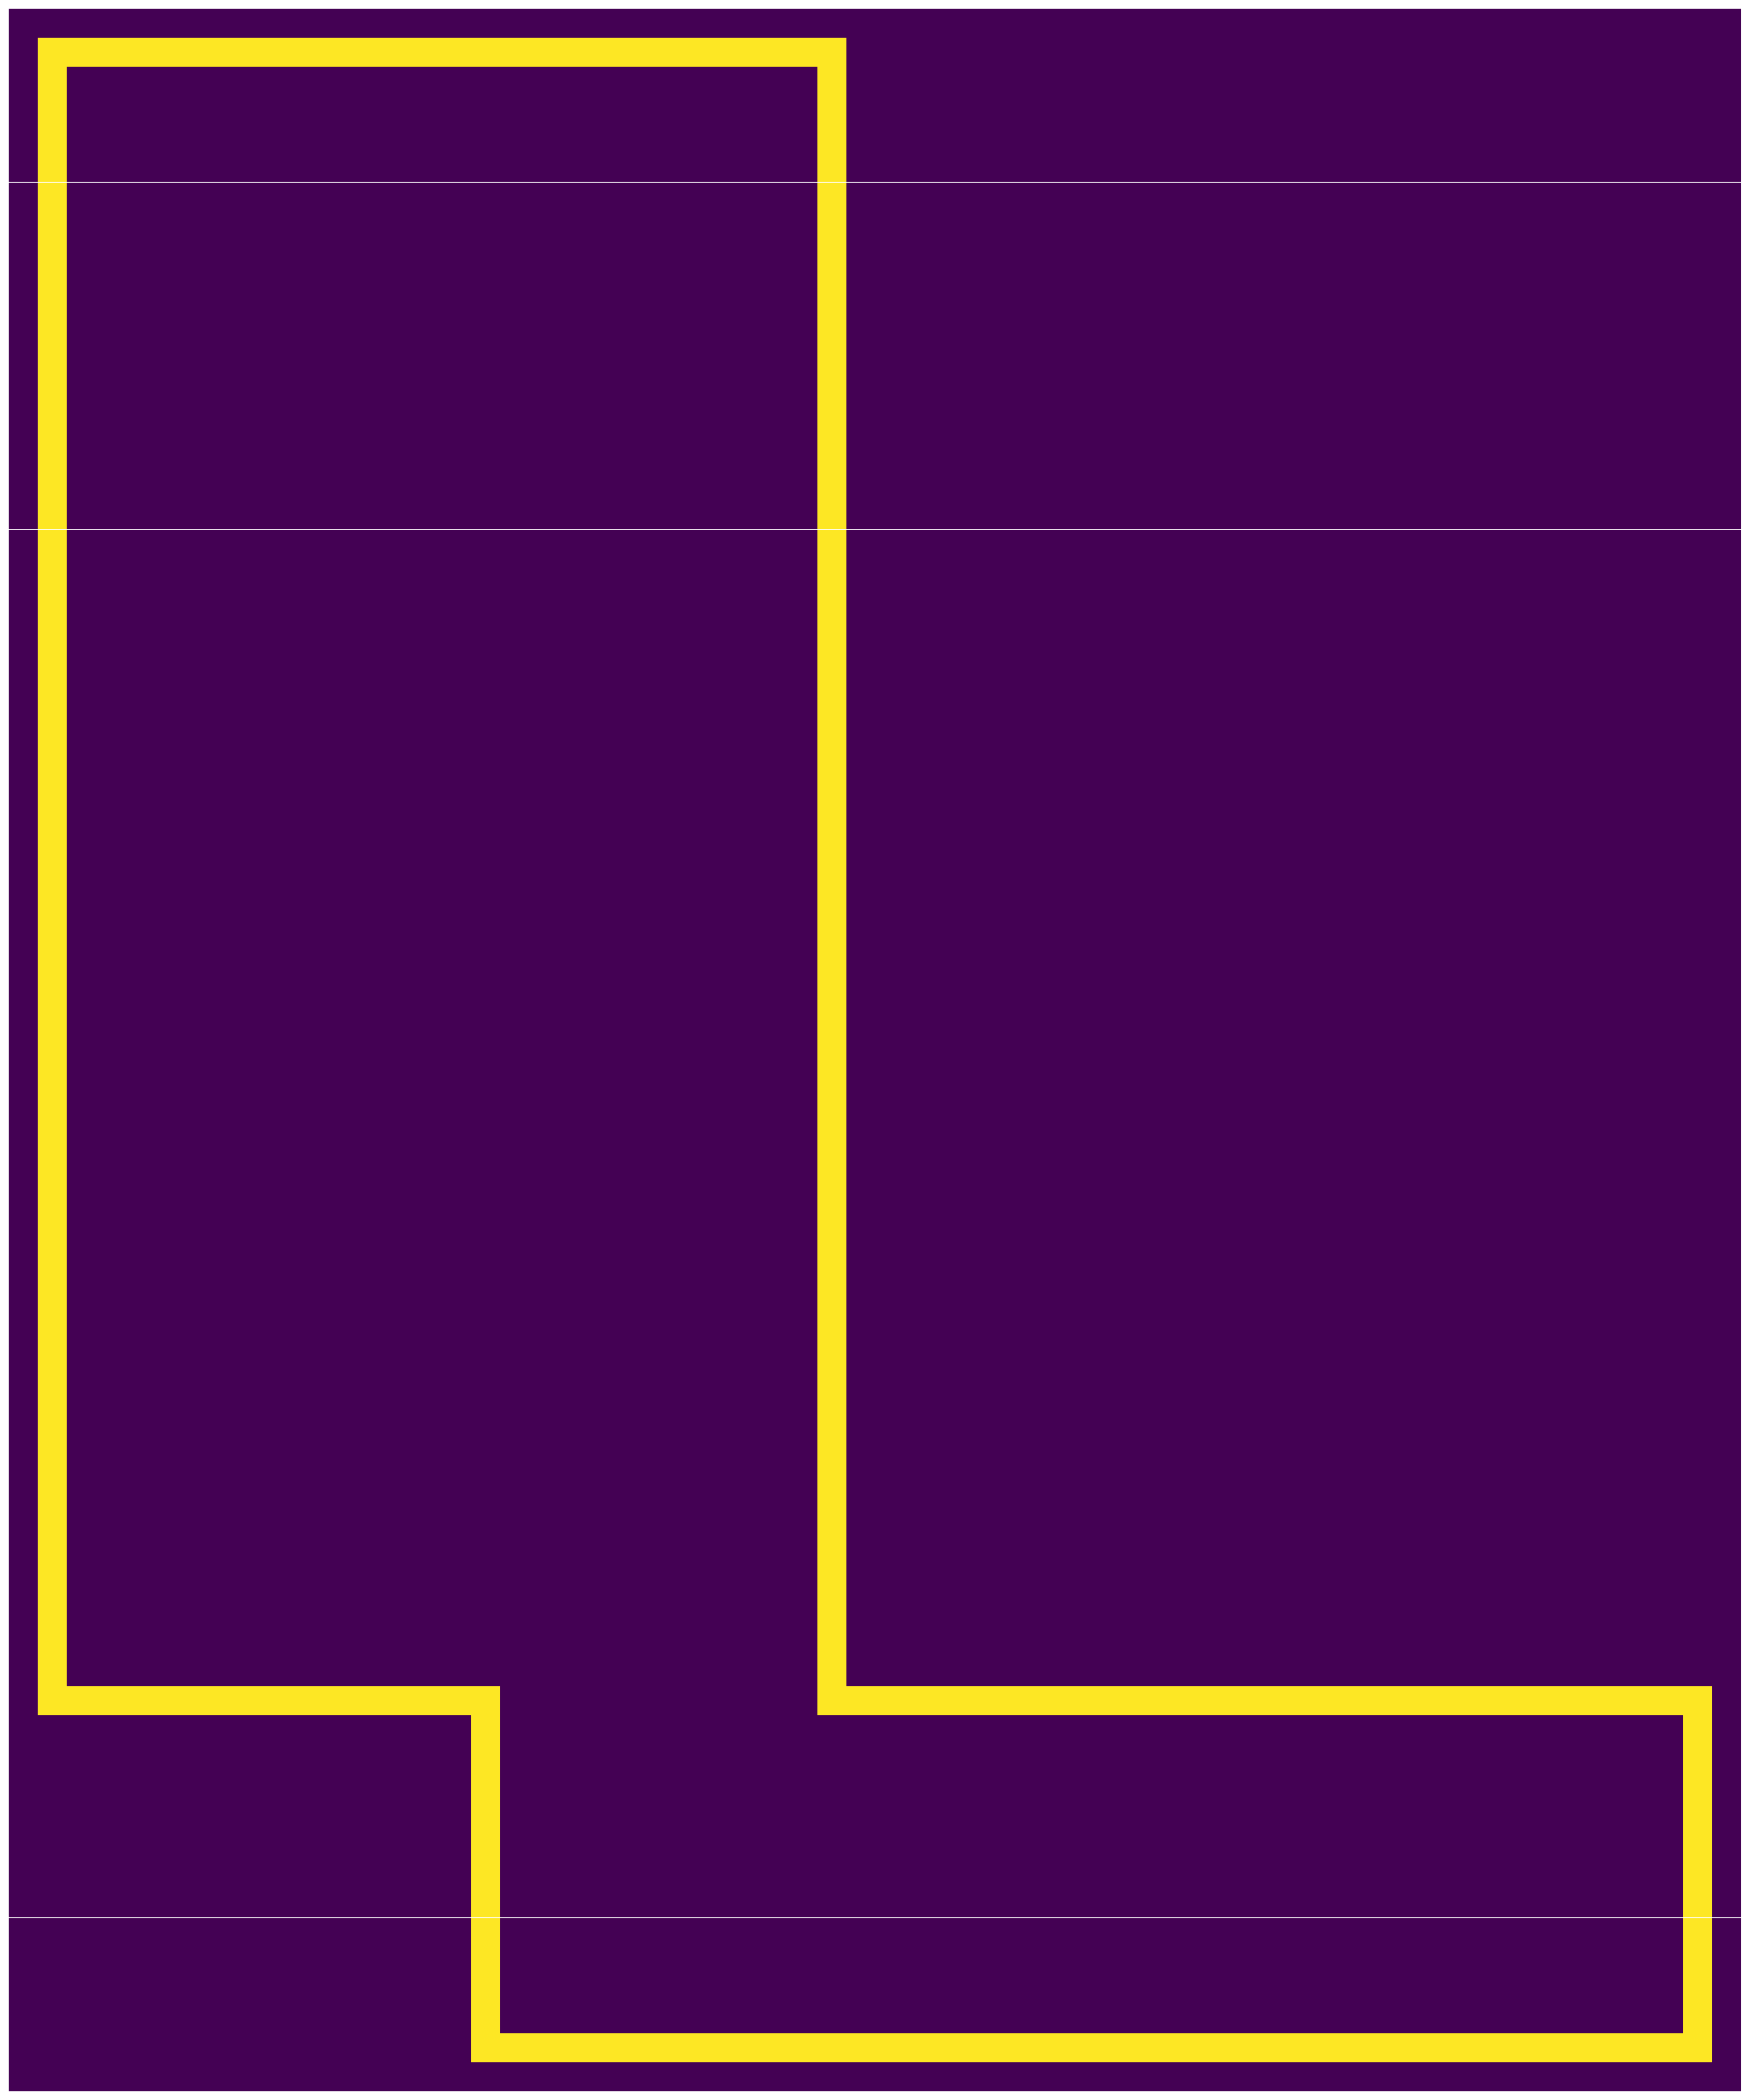

In [85]:
rect_a = gen_rect((10, 20), plot=False)
rect_b = gen_rect((15, 5), plot=False)

combined = glue_rect(rect_a, rect_b, offset=5)


x_a=10, y_a=20
x_b=15, y_b=5
Offset: 5


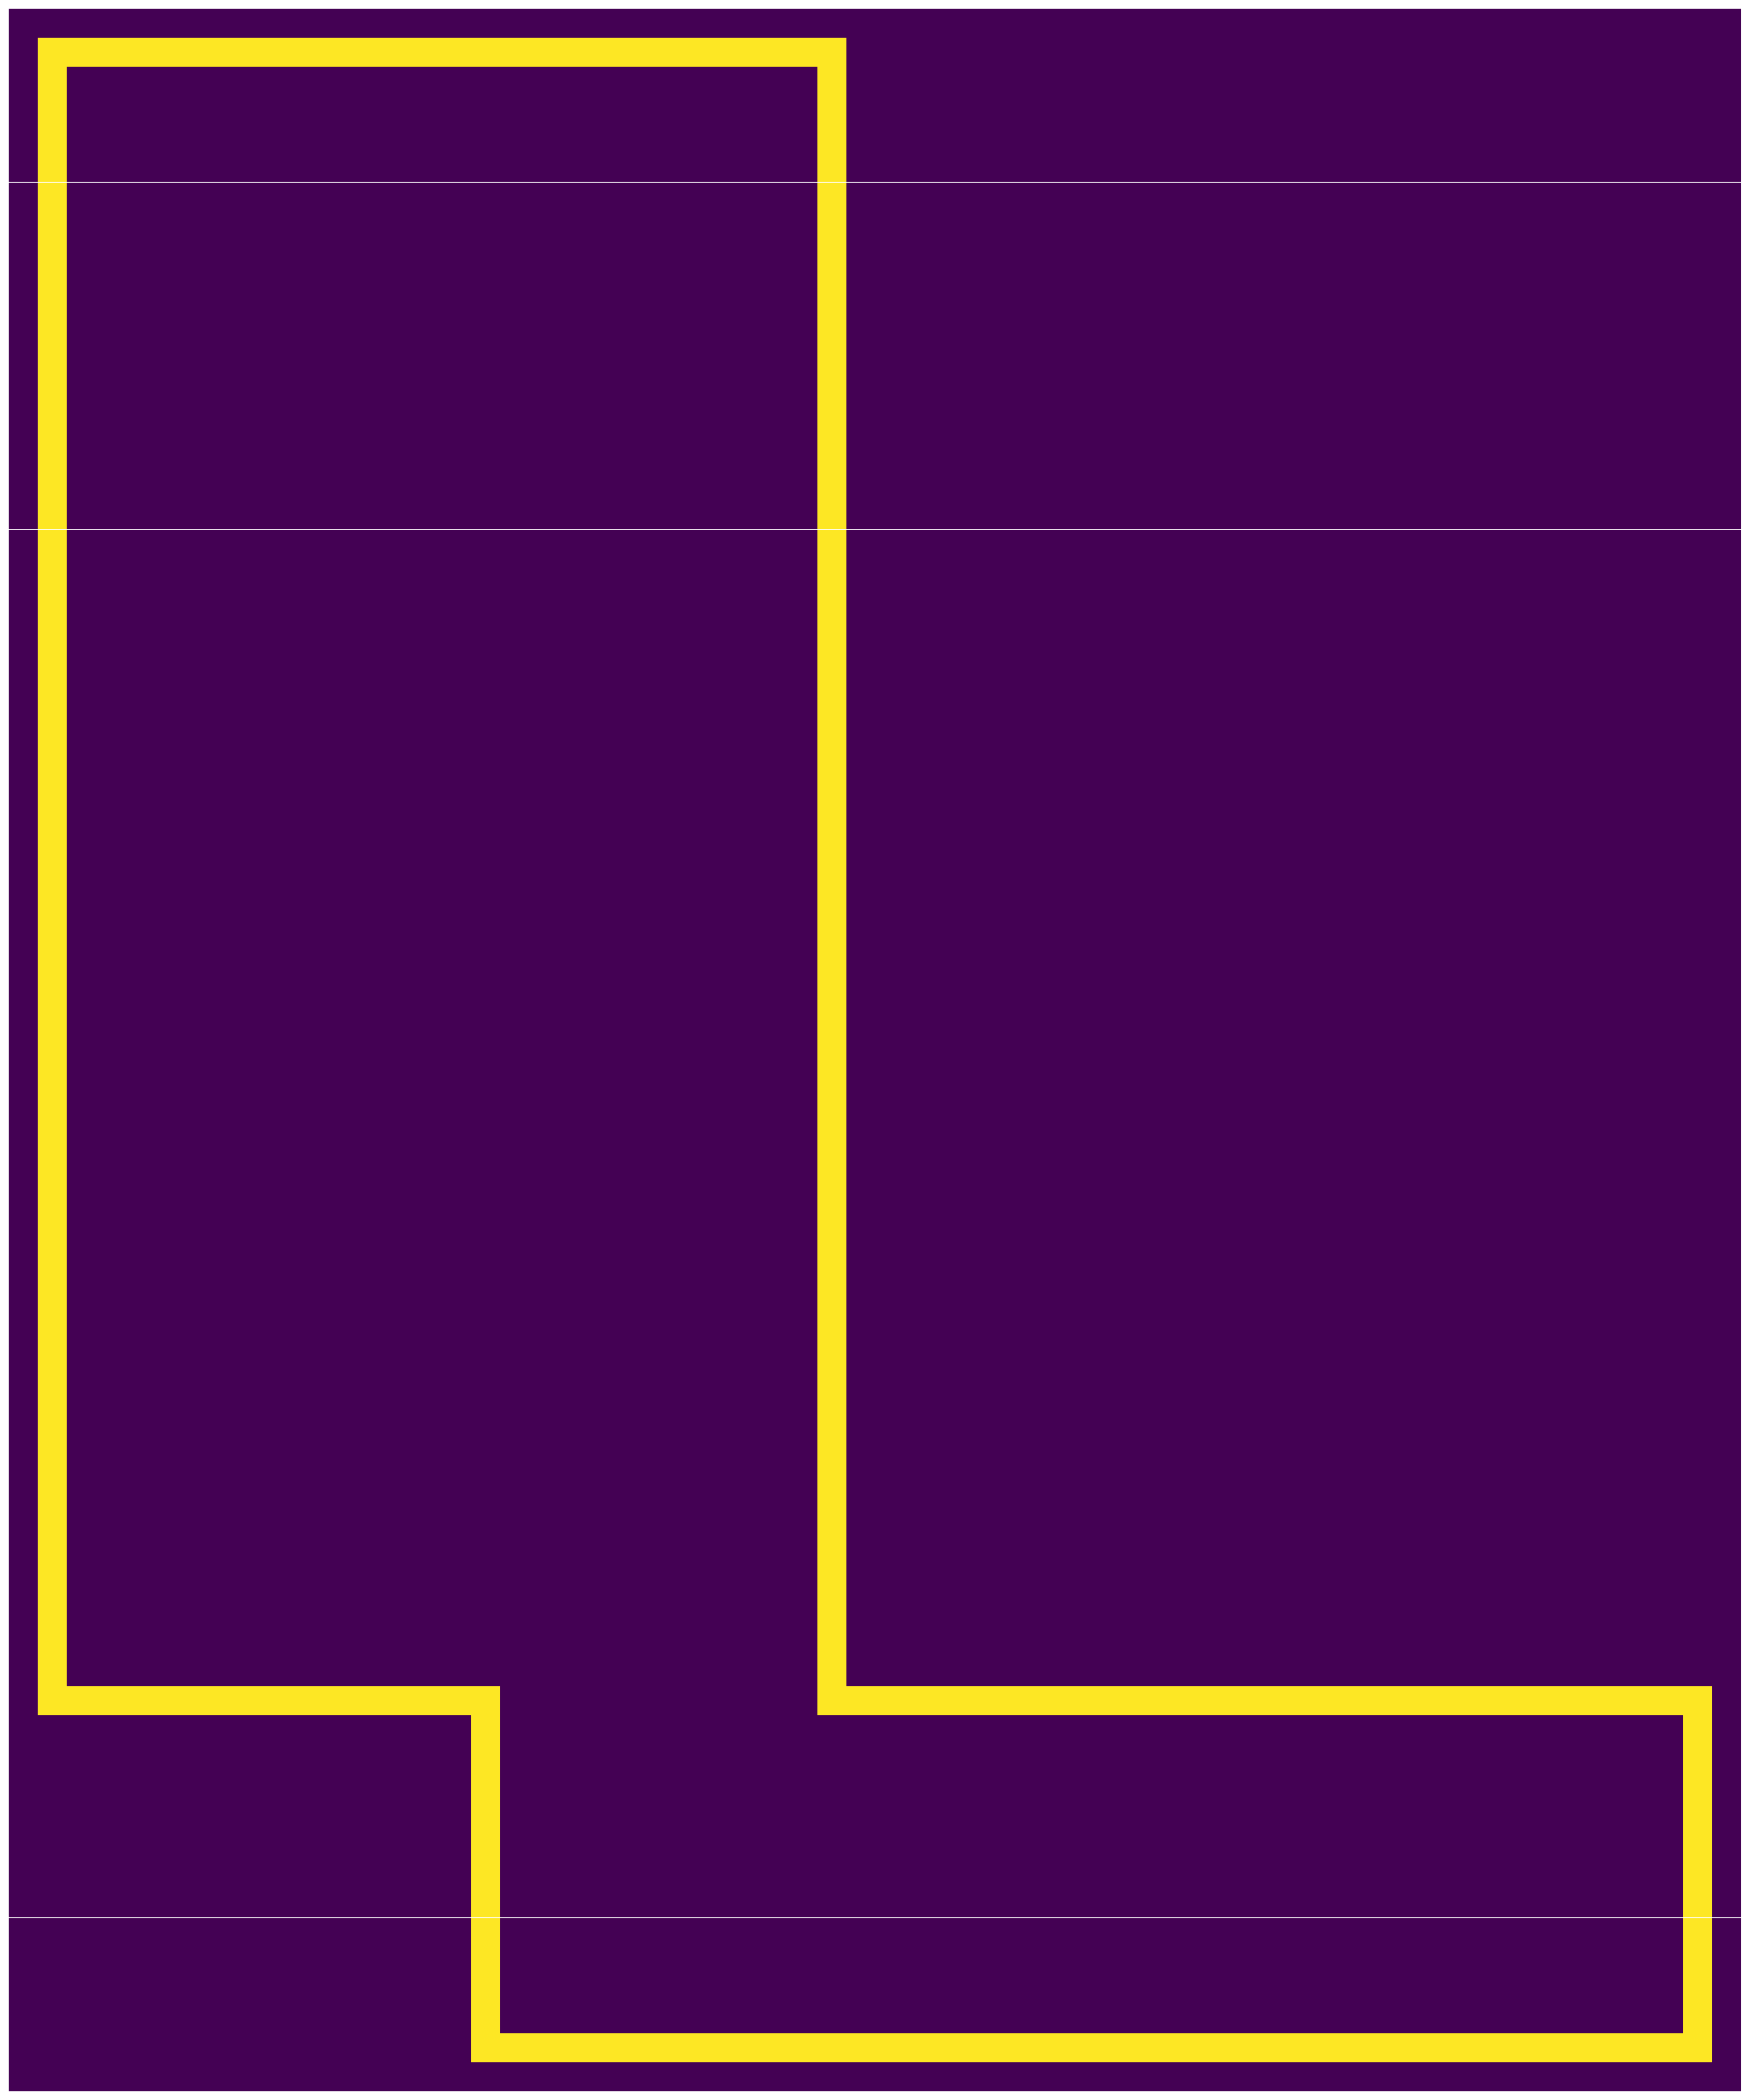

In [88]:
rect_a_int = gen_rect_int((10, 20))
rect_b_int = gen_rect_int((15, 5))
combined_int = glue_rect_int(rect_a_int, rect_b_int, offset=5)
combined_conv = into_to_wall(combined_int)
plot_rect((combined_conv.shape[1], combined_conv.shape[0]),combined_conv)